# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 19, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.sparse import diags
%matplotlib inline

import autograd
import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import grad

import scipy.optimize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## 1. Data

https://github.com/HyTruongSon/Pattern-Classification/tree/master/MIT-CBCL-database

(6977, 361)


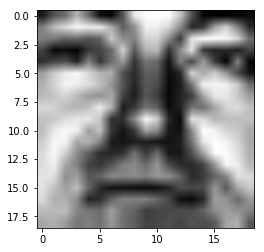

In [2]:
X = open('./svm.train.normgrey').readlines()
X = np.array([[float(yy) for yy in xx.split()[:-1]] for xx in X[2:] if xx.strip() != ""])
print (X.shape)
plt.imshow(X[100].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

## 2. PCA

In [3]:
# Definition and parameter settings

X = np.transpose(X)

def normalize(data):
    mean = np.mean(data, axis=1)[:,None]
    return data - mean

(d, N) = X.shape
q = 49

print ("d",  d)
print ("N", N)
print ("q", q)

print ("X", (d, N))
print ("W", (d, q))
print ("Z", (q, N))
# X : (d, N)
# W : (d, q)
# Z : (q, N)

d 361
N 6977
q 49
X (361, 6977)
W (361, 49)
Z (49, 6977)


In [4]:
choose_which = "nmf"
# "compute_c", "svd", "sgd", "nmf"

In [5]:
if choose_which == "nmf":
    X = X - np.min(X)
else:
    X = normalize(X)

In [6]:
if choose_which == "svd":
    W, S, V = linalg.svd(X)
    print ("X", X.shape)
    print ("W", W.shape)
    print ("S", S.shape) 
    print ("V", V.shape)
    
    #Sig = np.diag(S * S)
    #print (Sig.shape)
    #C = W * Sig * np.transpose(W)
    
elif choose_which == "compute_c":
    C = X @ np.transpose(X)
    e_val, W = np.linalg.eig(C)
    W = autograd.numpy.real( W )
    
    print ("C", C.shape)
    print ("e_val", e_val.shape)
    print ("W", W.shape)
    
elif choose_which == "sgd":
    
    def print_diff(W):
        W2 = W @ np.transpose(W)
        dd = np.mean(np.identity(d) - W2)
        norm = np.mean(W2)
        print ("W     (Norm | Max | Min) : ({:.8f} | {:.8f} | {:.8f})".format(np.linalg.norm(W), np.max(W), np.min(W)))
        print ("WW^T (Diff | Norm) : ({:.8f}, {:.8f})".format(dd, norm) )
    
    def dist(W, X, d, q):
        W = W.reshape(d, q)
        dd = X - W @ autograd.numpy.transpose(W) @ X
        norm = autograd.numpy.linalg.norm( dd )
        return norm * norm
    
    maxiter = 1600
    W = autograd.numpy.real( (autograd.numpy.random.rand(d,q) - 0.5) )
    print ('start optimising...')
    print_diff(W)
    trained_model = scipy.optimize.minimize(dist, W, (X, d, q), method='CG', jac=grad(dist), options={'maxiter':maxiter})
    print ('optimisation finished')
    W = trained_model.x.reshape(d,q)
    print_diff(W)
    
elif choose_which == "nmf":
    multiplicative = True
    maxiter = 10000
    W = np.real( (np.random.rand(d,q))*0.5 )
    Z = np.real( (np.random.rand(q,N))*0.5 )
    print ('start optimising...')
    # X : (d, N)
    # W : (d, q)
    # Z : (q, N)        
    for u_iter in range(maxiter):
        if multiplicative:
            diff = X - W @ Z
            W = W * (X @ np.transpose(Z)) / (W @ Z @ np.transpose(Z))
            Z = Z * (np.transpose(W) @ X) / (np.transpose(W) @ W @ Z)

        else:
            lr = 0.0001
            W_ = W + lr * (diff) @ np.transpose(Z)
            Z_ = Z + lr * np.transpose(W) @ (diff)       

            W, Z = np.maximum(W_, 0, W_), np.maximum(Z_, 0, Z_)

        if u_iter % 500 == 0:
            print (autograd.numpy.linalg.norm(diff))
        
    print ('optimisation finished')


start optimising...
18871.26093626726
194.10498664032806
188.93135753401353
186.95724275658162
185.7819703379667
184.9733391037873
184.4106657249607
183.93796954084362
183.59485153139008
183.32124509382757
183.08776189581613
182.88956068081342
182.73733074080306
182.60475379791086
182.49443873031223
182.3923702013442
182.31703076820148
182.25482151182732
182.18927097648927
182.13981879150575
optimisation finished


In [7]:
W_q = W[:,:q]

W_q = np.transpose(W_q)

if choose_which == "nmf":
    Z = np.transpose(Z)
else:
    Z = np.transpose(np.matmul(W_q, X))

## 3. Visualizing the components

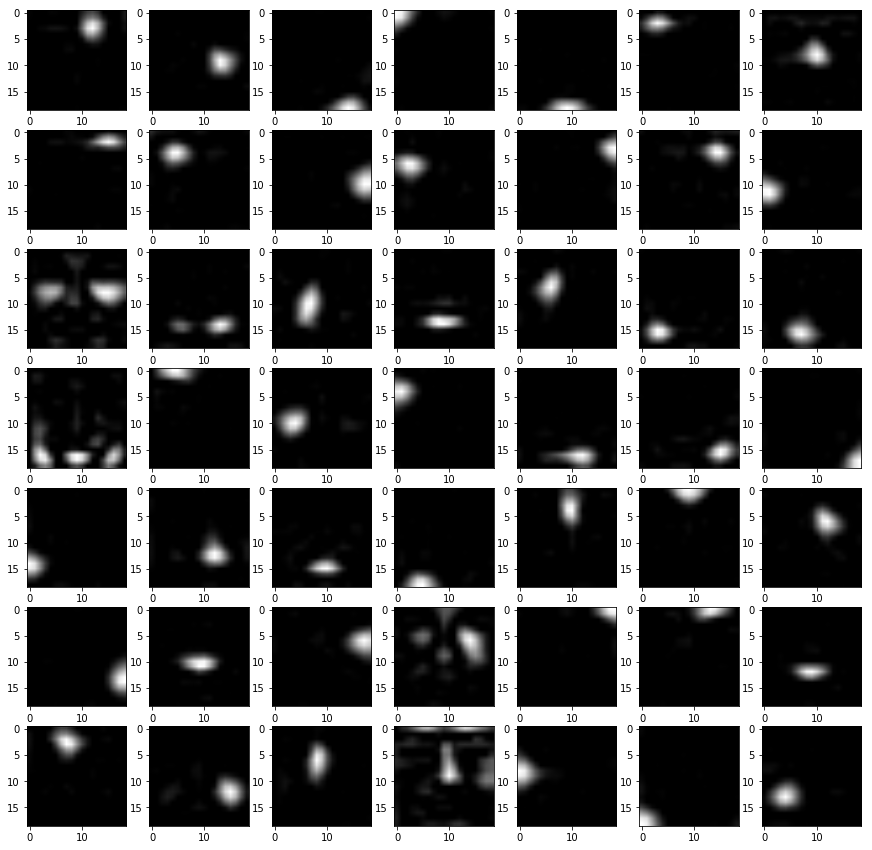

In [8]:
f, axarr = plt.subplots(int(np.sqrt(q)), int(np.sqrt(q)), figsize = (15, 15))

comp_ix = 0
for j in range(int(np.sqrt(q))):
    for i in range(int(np.sqrt(q))):
        axarr[i, j].imshow(W_q[comp_ix].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")
        comp_ix += 1

## 4. Reconstructing an image

In [9]:
# Do you understand what's happening here?

X_sample_rec_nmf = np.dot(Z[50], W_q)

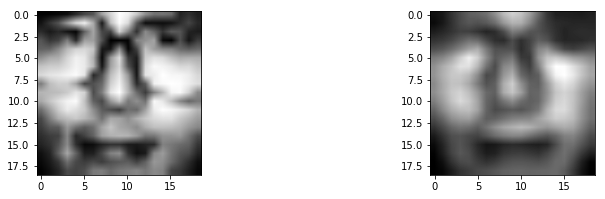

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X[:,50].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

plt.subplot(1, 3, 3)
plt.imshow(X_sample_rec_nmf.reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

1.909 2.170 3.378 2.250 2.941 2.984 2.202 
2.205 1.948 1.211 2.204 1.222 1.053 3.105 
1.551 3.647 1.266 3.124 1.199 2.685 1.282 
1.788 3.406 1.659 1.841 1.798 2.932 1.659 
1.306 1.219 2.051 1.282 1.932 1.107 3.288 
1.726 1.845 1.830 1.914 2.979 1.690 2.576 
1.791 3.113 1.368 2.124 1.242 1.026 1.969 


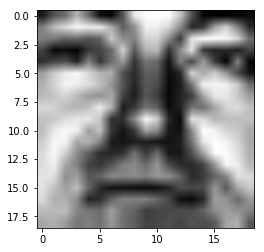

In [11]:
random_X = X[:,100]
plt.imshow(random_X.reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")
    # X : (d, N)
    # W : (d, q)
    # Z : (q, N)        

random_Z = W_q @ random_X # q, 1
hh = (random_Z / np.sum(random_Z) * 100)
for idx in range(7):
    for idx2 in range(7):
        print ("{:.3f}".format(hh[idx*7 + idx2]), end=" ")
    print ()